# Conceptual
## What is the intution behind SVMs and how do they work?
The intuition behind **Support Vector Machines (SVMs)** is rooted in **geometry** and **optimization**. Here's they work
**Goal of SVMs**To find the **best boundary** (hyperplane) that separates data into classes **with the maximum margin**—i.e., as far away from the closest points as possible.

### **Core Concepts**

1. **Hyperplane**
   In a 2D space, it's a line; in 3D, it's a plane; and in general, it's a (p–1)-dimensional flat surface that separates the p-dimensional space into two halves.

2. **Margin**
   The distance from the hyperplane to the **nearest data point** of any class. SVM aims to **maximize this margin**.

3. **Support Vectors**
   The data points **closest to the hyperplane**. These are **critical**: they define the position and orientation of the hyperplane.

4. **Maximal Margin Classifier** (hard margin)
   Used when the data is perfectly separable. SVM finds the hyperplane that gives the largest margin and **no misclassifications**.

---

### **If Data Is Not Perfectly Separable**

* this is most often the case then:

  * We allow **some points to be on the wrong side** using **slack variables** (soft margin).
  * Introduce a tuning parameter **C** to balance:

    * **Maximizing the margin** (simpler model, higher bias),
    * **Minimizing classification error** (more complex model, lower bias).

---

### **If the data has Nonlinear Boundaries?**

* Sometimes, data isn't separable by a straight line/plane.
* SVM handles this by:

  * **Transforming the data** to a higher-dimensional space (using a function φ(x)),
  * In that space, the data becomes **linearly separable**.

---

### **Kernel Trick**

* Instead of computing φ(x) and φ(x′), we compute a **kernel function**:
  **K(x, x′) = φ(x) • φ(x′)**
  This lets us work in high- or infinite-dimensional spaces **without computing φ explicitly**.

* Common kernels:

  * Linear: $K(x, x') = x^T x'$
  * Polynomial
  * Radial Basis Function (RBF or Gaussian): $K(x, x') = \exp(-\gamma \|x - x'\|^2)$

---

### **in short**
SVMs work by computing a hyperplane that separates the classes and **maximizes the margin**,Allow some points to be misclassified if needed (**soft margin**) an it Uses **only the support vectors** to define the classifier, if no linear separator exists it use a **kernel** to transform data into a space where it does

## Are SVMs always robust regarding overfitting and noisy data? Discuss your answer considering aspects such as the choice of kernel and the degree of noise in the data.



### **Are SVMs always robust regarding overfitting and noisy data?**

**No, SVMs are not *always* robust** to overfitting or noisy data — **their performance heavily depends on several factors**, including the **choice of kernel**, the **parameter C**, and the **degree of noise** in the dataset.

---

###  **Why SVMs Can Overfit or Underfit**

#### 1. **Choice of C controls the bias-variance tradeoff**

  * A **large C** tries to **minimize classification error** and allows **less slack** — this can lead to **overfitting**, especially if there's **noise**.
  * A **small C** allows more margin violations, which can increase bias but often makes the model **more robust to noise** and **less prone to overfitting**.

#### 2. **Slack Variables and Noisy Data**

  * Noisy data points can lie on the **wrong side of the margin or even the hyperplane**.
  * SVMs use **slack variables εᵢ** to allow flexibility, but if there’s a lot of noise, many points may violate the margin, weakening the model.

#### 3. **Choice of Kernel**

  * **Complex kernels** (like high-degree polynomial or RBF with small γ) can model very intricate decision boundaries.
  * This flexibility can **lead to overfitting** if the kernel is **too expressive for the amount of data** or if the data is noisy.
  * **Simpler kernels** (like linear) are more robust in such cases.

  Refrance Lecture 8: Support Vector Machines


# Practical
## Overview of the steps
1. Generate data and get an overview of the data
2. Learn and assess an support vector (soft margin) classifier
3. Learn and assess an SVM classifier
4. Learn and assess an SVM classifier for multiple classes
5. Apply SVM to Gene Expression Data

## Steps in detail

### Generate data and get an overview of the data

Generate the observations belonging to two classes.
Therefore, we use rnorm that generates a vector of n=20*2 normally distributed random
numbers. We split them into two columns in a predictor matrix x corresponding to two
predictors and assign two classes in a response vector y : -1 to the first ten observations
and 1 to the last ten observations. Then we plot the data

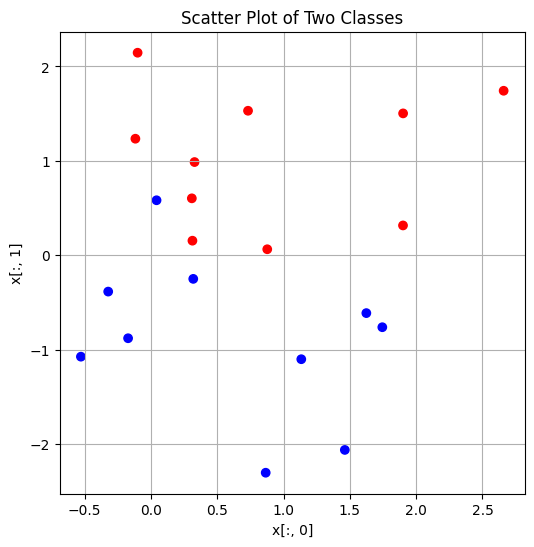

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)
x = np.random.randn(20, 2)
y = np.array([-1]*10 + [1]*10)
x[y == 1] += 1


colors = np.where(y == 1, 'red', 'blue')

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.xlabel("x[:, 0]")
plt.ylabel("x[:, 1]")
plt.title("Scatter Plot of Two Classes")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df_x = pd.DataFrame(x, columns=["x1", "x2"])
df_x.index += 1  

series_y = pd.Series(y, name="y")
series_y.index += 1

print("x:")
print(df_x)

print("\ny:")
print(series_y.to_list())

x:
          x1        x2
1   1.624345 -0.611756
2  -0.528172 -1.072969
3   0.865408 -2.301539
4   1.744812 -0.761207
5   0.319039 -0.249370
6   1.462108 -2.060141
7  -0.322417 -0.384054
8   1.133769 -1.099891
9  -0.172428 -0.877858
10  0.042214  0.582815
11 -0.100619  2.144724
12  1.901591  1.502494
13  1.900856  0.316272
14  0.877110  0.064231
15  0.732112  1.530355
16  0.308339  0.603246
17  0.312827  0.154794
18  0.328754  0.987335
19 -0.117310  1.234416
20  2.659802  1.742044

y:
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Check visually whether the classes are linearly separable. They are not.
kinda!! linearly separable but with a narrow margin and only few misclassifications
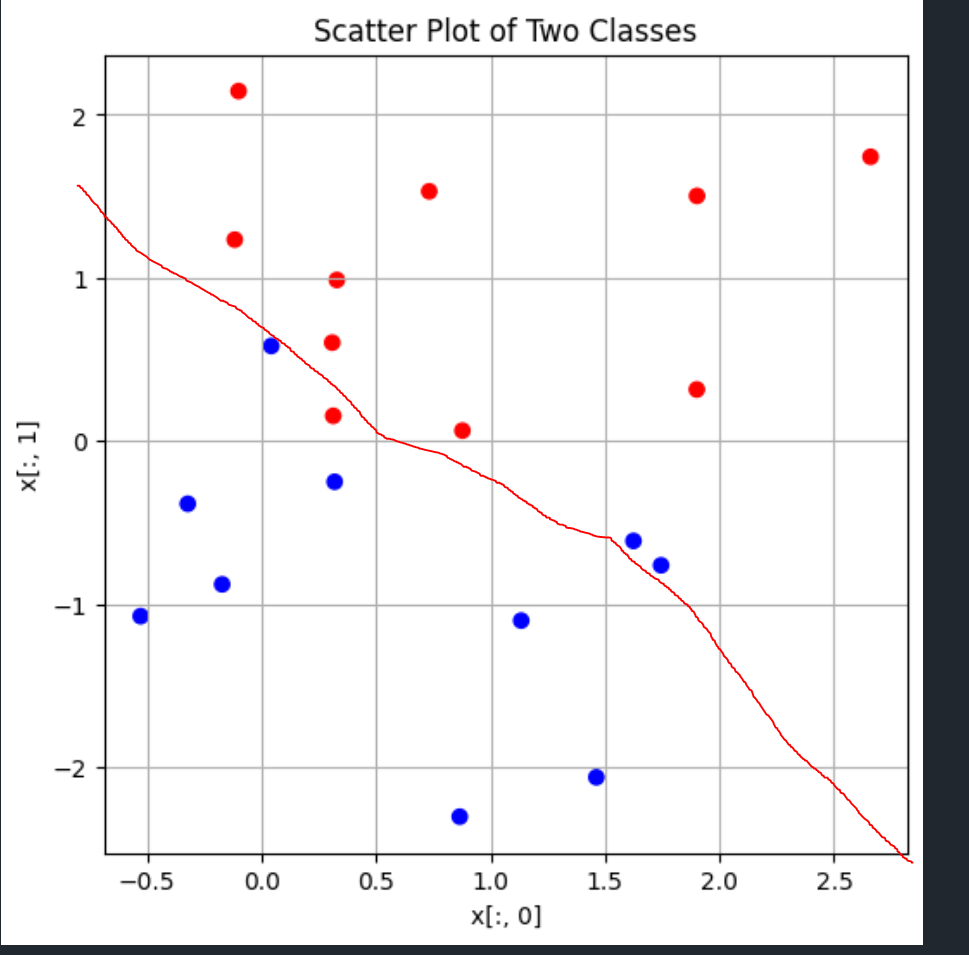

### Learn and assess a support vector (soft margine) classifier
Fit the support vector classifier.


In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Combine predictors and response into a DataFrame (optional but R-like)
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y

# Train a linear SVM (scale=False in R means we avoid feature scaling)
svm_model = SVC(kernel='linear', C=10)  # C is the inverse of regularization strength

# Fit model
svm_model.fit(x, y)


SVC(C=10, kernel='linear')

Plot the support vector classifier obtained.

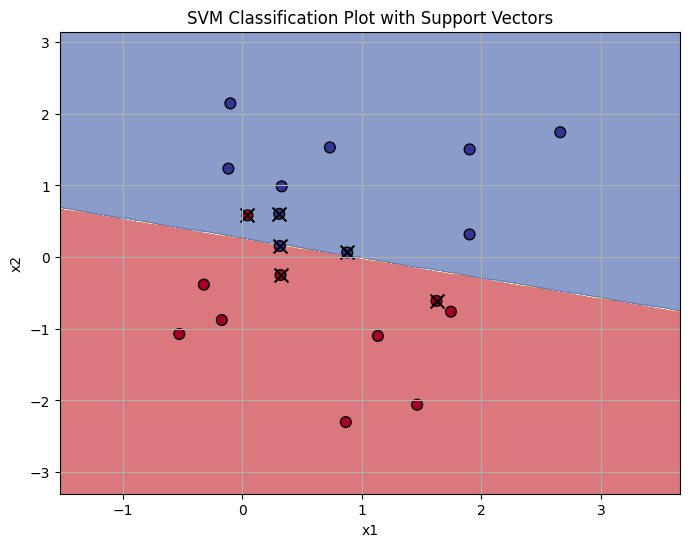

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid over the plot range
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
xy = np.c_[xx.ravel(), yy.ravel()]
Z = svm_model.predict(xy).reshape(xx.shape)

# Plot the classification regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, s=60, edgecolors='k')

# Plot support vectors with 'x' marker (no edgecolor warning)
plt.scatter(svm_model.support_vectors_[:, 0],
            svm_model.support_vectors_[:, 1],
            s=100, linewidths=1.5, marker='x', color='black')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Classification Plot with Support Vectors")
plt.grid(True)
plt.show()


The support vectors are plotted as crosses and the remaining observations are plotted as
circles; we see here that there are seven support vectors.
Determine their identities (row numbers in the data matrix).

In [11]:
# Get indices of support vectors
support_indices = svm_model.support_
print("Support vector indices", support_indices)


Support vector indices [ 0  4  9 13 15 16]


What if we instead used a smaller value of the cost parameter?

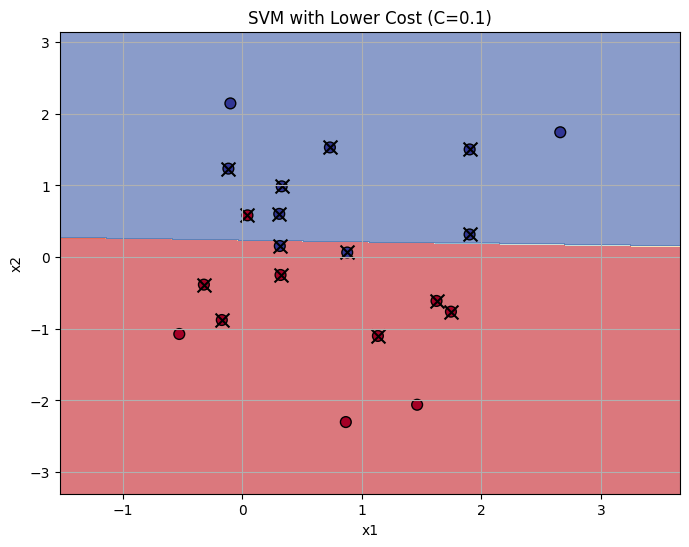

Support vector indices: [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]


In [12]:
# Re-train SVM with a smaller cost parameter
svm_model_lowC = SVC(kernel='linear', C=0.1)
svm_model_lowC.fit(x, y)

# Plot decision boundary again
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_model_lowC.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, s=60, edgecolors='k')
plt.scatter(svm_model_lowC.support_vectors_[:, 0],
            svm_model_lowC.support_vectors_[:, 1],
            s=100, linewidths=1.5, marker='x', color='black')
plt.title("SVM with Lower Cost (C=0.1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()
print("Support vector indices:", svm_model_lowC.support_ )


Absolutely — here’s your **revised interpretation** with your writing style preserved, but now accurately reflecting the insight that **larger C is better in this case**, and **smaller C leads to underfitting**, not generalization:

---

### **interpretation**

first visualized them with a scatter plot — showing that the classes are **linearly separable**, but the separation is **tight**, with only a couple of borderline points.

then 2 models were trained — one with high cost and one with low cost.
the high cost one `C=10` translates to **a strong penalty for misclassification**, meaning the model prefers a **tight margin** and will do its best to correctly classify even borderline points.
it used **6 support vectors**, which makes sense — it’s confident in its separation and doesn’t need to rely on many points to define the boundary.
this setup is actually **ideal for this data**, which is clean and mostly separable.

the low cost one `C=0.1` relaxes the penalty for misclassification, encouraging the model to **widen the margin** and allow more tolerance for violations.
but in this case, that backfires — the model ends up using **15 support vectors out of just 20 points**, which shows it’s **unsure** and trying to hedge its bets.
it’s essentially underfitting — trying to play it safe on a dataset that doesn’t need it.

**More support vectors** in this context means the model lacks confidence, not that it’s generalizing better.

here is a table that sumrize the diffrence

### Bias–Variance Tradeoff

| Aspect          | High Cost (C=10) | Low Cost (C=0.1) |
| --------------- | ---------------- | ---------------- |
| Margin          | Narrow           | Wide             |
| Support Vectors | Few (6)          | Many (15)        |
| Flexibility     | Just Right       | Too High         |
| Bias            | Low              | High             |
| Variance        | Moderate         | Low              |
| Under/Overfit   | Well-fitted      | Underfitted      |



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define range of cost values to test (same as R: 1e-3 to 1e2)
param_grid = {'C': [1e-3, 1e-2, 0.1, 1, 5, 10, 100]}

# Set up SVM model with linear kernel
svc = SVC(kernel='linear')

# Set up 10-fold cross-validation
grid = GridSearchCV(svc, param_grid, cv=10)

# Fit to data
grid.fit(x, y)

# Best parameters and score
print("Best cost parameter (C):", grid.best_params_['C'])
print("Best CV accuracy (1 - error):", grid.best_score_)
print("Best CV error:", 1 - grid.best_score_)

# Full CV results in a table
import pandas as pd

results_df = pd.DataFrame(grid.cv_results_)
display(results_df[['param_C', 'mean_test_score', 'std_test_score']])


Best cost parameter (C): 0.001
Best CV accuracy (1 - error): 0.95
Best CV error: 0.050000000000000044


,param_C,mean_test_score,std_test_score
0,0.001,0.95,0.150000
1,0.010,0.95,0.150000
2,0.100,0.85,0.229129
3,1.000,0.90,0.200000
4,5.000,0.90,0.200000
5,10.000,0.90,0.200000
6,100.000,0.90,0.200000


###  Interpretation 

#### Best Models

* **Best cost parameter (C):** `0.001` and `0.01`
* **Best cross-validation accuracy:** `0.95` → **5% error rate**
* This means: across 10 random splits of your dataset, on average, **95% of the test observations were correctly classified** using `C = 0.001`or `0.01`.


#### Observations:

* Very **small values of `C` (0.001, 0.01)** gave the **best performance**.
* **Performance dropped** when `C` increased to `0.1`, and slightly improved again at `C ≥ 1`, but **never surpassed** the small `C` models.
* **Standard deviation** is fairly large (especially at low `C`), meaning **some folds varied significantly** — possibly due to small data size.

*   **why i think Low C did better**

  * Encourages a **wider margin** yolerates more misclassifications yielding **simpler, more generalizable models**
  * Works best here because the data is **not perfectly separable**, and regularization helps



In [15]:
# Get the best model from cross-validation
best_model = grid.best_estimator_

# Summarize the model
print("Best SVM model (from GridSearchCV):")
print(best_model)

# Number of support vectors per class
print("\nNumber of support vectors per class:")
print(best_model.n_support_)

# Total number of support vectors
print("\nTotal number of support vectors:", best_model.support_.shape[0])

# Class labels
print("\nClass labels:", best_model.classes_)


Best SVM model (from GridSearchCV):
SVC(C=0.001, kernel='linear')

Number of support vectors per class:
[10 10]

Total number of support vectors: 20

Class labels: [-1  1]


In [16]:
# Generate new test data (20 observations with 2 predictors)
xtest = np.random.randn(20, 2)

# Randomly assign class labels (-1 or 1) to the test data
ytest = np.random.choice([-1, 1], size=20, replace=True)

# Shift the class 1 points like we did before
xtest[ytest == 1] += 1

# Combine into a DataFrame (optional, for clarity or inspection)
test_df = pd.DataFrame(xtest, columns=['x1', 'x2'])
test_df['y'] = ytest

# Display a few rows (optional)
print(test_df.head())


         x1        x2  y
0  2.145302  0.516416  1
1  2.019404  0.014132  1
2 -1.244956  1.923862 -1
3 -0.442951  1.545524 -1
4 -0.918436  0.005082  1


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict class labels for test data using the best model
ypred = best_model.predict(xtest)

# Create confusion matrix
conf_mat = confusion_matrix(ytest, ypred, labels=[-1, 1])
print("Confusion matrix:\n", conf_mat)

# Optionally print a nicer format like R's table
print("\nFormatted confusion matrix:")
print(pd.DataFrame(conf_mat, 
                   index=['Actual -1', 'Actual 1'], 
                   columns=['Predicted -1', 'Predicted 1']))


Confusion matrix:
 [[4 7]
 [3 6]]

Formatted confusion matrix:
           Predicted -1  Predicted 1
Actual -1             4            7
Actual 1              3            6



### Interpretation

* **True Negatives (TN):** 4
* **False Positives (FP):** 7
  → 7 points predicted as `1` were actually `-1`
* **False Negatives (FN):** 3
  → 3 points predicted as `-1` were actually `1`
* **True Positives (TP):** 6


* The model performs **moderately well**, but:

  * It struggles more with correctly predicting the `-1` class (only 4 out of 11 actual `-1`s were correctly identified).
  * There are **more false positives** than false negatives.
* This might indicate that the **decision boundary is shifted** toward predicting `1`s, possibly due to:

  * The margin being too wide (from using `C = 0.001`)
  * A relatively small training set (only 20 samples)
  * the fact that the data was randomly generated


* The model did preforem better than i thought it would on the test set despite it beening trined on very small dataset.
* It shows a **bias-variance tradeoff** in action: **low `C` (0.001)** increases bias and tolerance for misclassification → a **simpler but less sharp** decision boundary.


### Learn and assess an SVM classifier
First, generate some data with a non-linear class boundary, as before. Generate 200
instead of 20 observations.

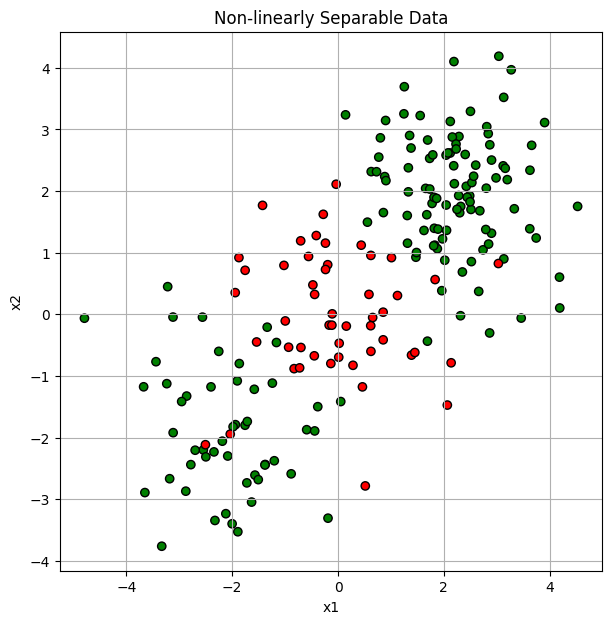

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
x = np.random.randn(200, 2)
x[:100] += 2
x[100:150] -= 2
y = np.array([-1]*150 + [1]*50)
dat = pd.DataFrame(x, columns=["x1", "x2"])
dat['y'] = y
colors = np.where(y == 1, 'red', 'green')  
plt.figure(figsize=(7, 7))
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Non-linearly Separable Data")
plt.grid(True)
plt.show()


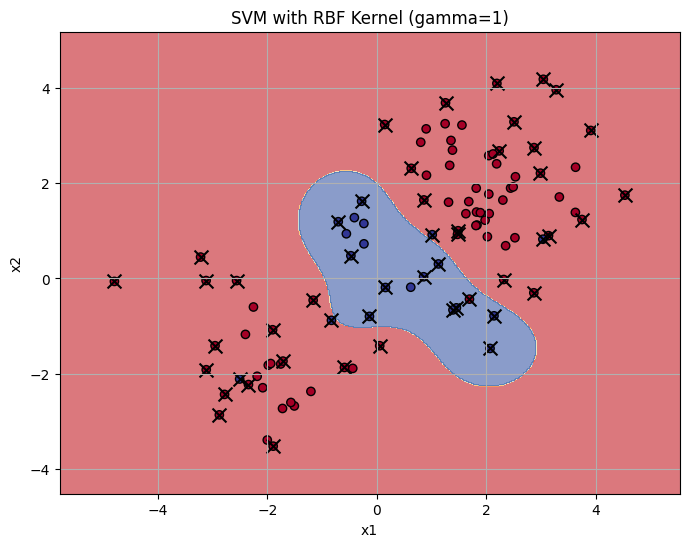

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split data into training and testing (50/50)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=100, random_state=1)

# Train SVM with radial kernel (RBF), gamma=1, default C=1
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(x_train, y_train)
# Meshgrid for plotting
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on the grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.scatter(svm_rbf.support_vectors_[:, 0],
            svm_rbf.support_vectors_[:, 1],
            s=100, linewidths=1.5, marker='x', color='black')

plt.title("SVM with RBF Kernel (gamma=1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


We can see from the figure that there are a fair number of training errors in this SVM fit.


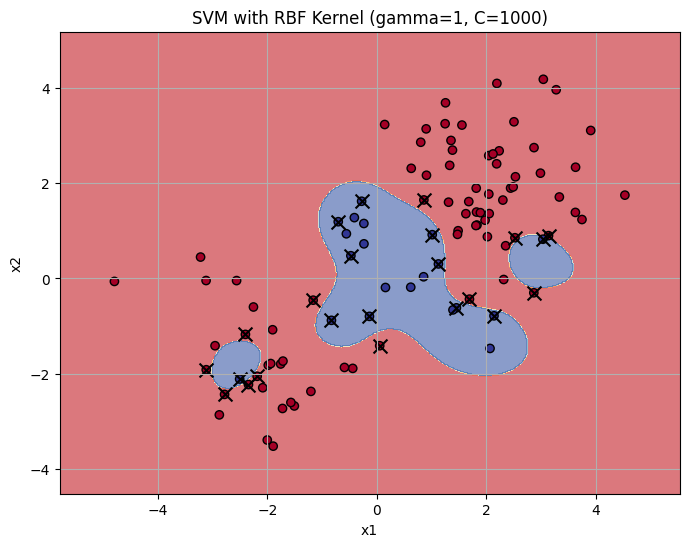

In [ ]:
# Re-train the SVM with higher cost (C=1000)
svm_rbf_highC = SVC(kernel='rbf', gamma=1, C=1000)
svm_rbf_highC.fit(x_train, y_train)
Z_highC = svm_rbf_highC.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_highC, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.scatter(svm_rbf_highC.support_vectors_[:, 0],
            svm_rbf_highC.support_vectors_[:, 1],
            s=100, linewidths=1.5, marker='x', color='black')

plt.title("SVM with RBF Kernel (gamma=1, C=1000)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


Use cross-validation to select the best choice of cost and 𝛾.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.5, 1, 2, 3, 4]
}

# Initialize SVM with RBF kernel
svc = SVC(kernel='rbf')

# Perform 5-fold cross-validation
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(x_train, y_train)
# Best parameters
print("Best parameters found:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Full table of results
import pandas as pd
results_df = pd.DataFrame(grid.cv_results_)
display(results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']])


Best parameters found: {'C': 1, 'gamma': 0.5}
Best CV accuracy: 0.9400000000000001


,param_C,param_gamma,mean_test_score,std_test_score
0,0.1,0.5,0.80,0.000000
1,0.1,1.0,0.80,0.000000
2,0.1,2.0,0.80,0.000000
3,0.1,3.0,0.80,0.000000
4,0.1,4.0,0.80,0.000000
5,1.0,0.5,0.94,0.048990
6,1.0,1.0,0.94,0.020000
7,1.0,2.0,0.91,0.037417
8,1.0,3.0,0.90,0.031623
9,1.0,4.0,0.88,0.040000


In [24]:

best_rbf_model = grid.best_estimator_

y_test_pred = best_rbf_model.predict(x_test)

conf = confusion_matrix(y_test, y_test_pred, labels=[-1, 1])
print("Confusion matrix:\n", conf)

print("\nFormatted confusion matrix:")
print(pd.DataFrame(conf,
                   index=['Actual -1', 'Actual 1'],
                   columns=['Predicted -1', 'Predicted 1']))


Confusion matrix:
 [[70  0]
 [10 20]]

Formatted confusion matrix:
           Predicted -1  Predicted 1
Actual -1            70            0
Actual 1             10           20


### Interpretetion

1. **from the graph**
    **Class −1** (150 pts) actually comes from **two distant clouds**; **class 1** (50 pts) sits in the centre → clearly **not** linearly separable.

2. **Split the data** – 100 points for training, 100 for test (held totally aside until the very end).

3. **Trained two “baseline” RBF-kernel SVMs**

   * `γ = 1, C = 1` ➜ wide, smooth boundary → several training errors.
   * `γ = 1, C = 1000` ➜ tight, wiggly boundary → *fewer* training errors but obvious risk of over-fitting.

4. **Hyper-parameter tuning via 5-fold cross-validation**

   * Searched a grid:

     * **C:** 0.1 → 1000
     * **γ:** 0.5 → 4
   * Cross-validation estimated test accuracy for every (C, γ) pair.
   * **Best combo:** `C = 1`, `γ = 0.5`, CV accuracy ≈ 94 %.
   meaning as suspected `C = 1000` was over-fitting

5. **best modle**
   * when evalutaing the best model on the test data we got a better understanding on how it will preform in realworld senario we can see that the **Accuracy** (70 + 20) / 100 = **90 %** whitch is very good, **Specificity** 70 / 70 = **100 %** but i dont think that is relaible and i think it would decreas over larger sample, **Recall / Sensitivity** 20 / 30 ≈ **0.67** this more realistic but its showing clear asymmetry.**Precision** 20 / 20 = **1.00** again in here i think it's great but its not a defetiv prove 



**What it means ?**

* The tuned RBF SVM learned a boundary that wraps tightly around the central class +1 region, but **prefers to predict −1** unless highly confident.
* Perfect specificity ➔ **zero false-positives**, but that came at the cost of **false-negatives** (missed +1’s).
* i think this might be because of **class imbalance** (150 vs 50 in the original population; 70 vs 30 in the test split) and the fact that CV optimised overall accuracy rather than, say, recall for the minority class.
* Hyper-parameters:

  * **Lower γ (0.5)** kept the decision surface smooth, avoiding the over-fitting we saw with high-C/high-γ.
  * **Moderate C (1)** balanced margin width and misclassification penalty.



### Learn and assess an SVM classifier for multiple classes
Generate data as before. We simply extend the matrix x with 50 new rows and assign these rows a new class.

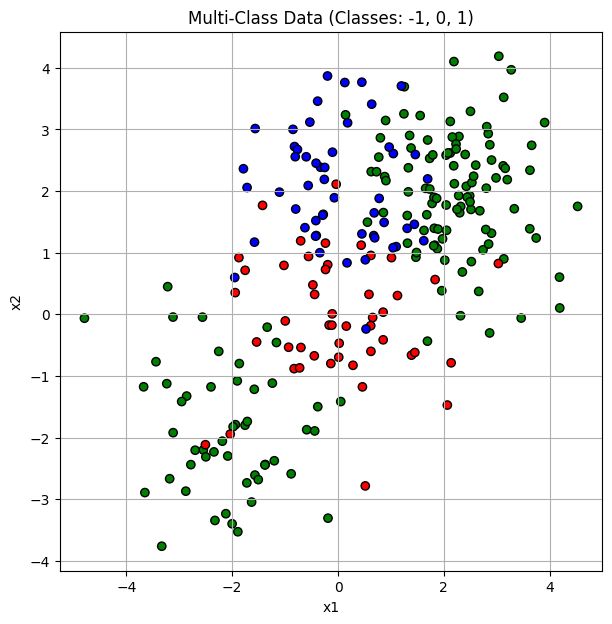

In [ ]:

x_new = np.random.randn(50, 2)

y_new = np.array([0]*50)

x_new[:, 1] += 2

x_multiclass = np.vstack([x, x_new])
y_multiclass = np.concatenate([y, y_new])

dat_multiclass = pd.DataFrame(x_multiclass, columns=["x1", "x2"])
dat_multiclass['y'] = y_multiclass

color_map = {1: 'red', -1: 'green', 0: 'blue'}
colors = [color_map[label] for label in y_multiclass]

plt.figure(figsize=(7, 7))
plt.scatter(x_multiclass[:, 0], x_multiclass[:, 1], c=colors, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Multi-Class Data (Classes: -1, 0, 1)")
plt.grid(True)
plt.show()


Fit an SVM to the training data.

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split 250 data points: 125 train, 125 test
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(
    x_multiclass, y_multiclass, train_size=125, random_state=1)

# Train multi-class SVM with radial (RBF) kernel
svm_multi = SVC(kernel='rbf', C=10, gamma=1)  # same as R code
svm_multi.fit(x_train_multi, y_train_multi)


SVC(C=10, gamma=1)

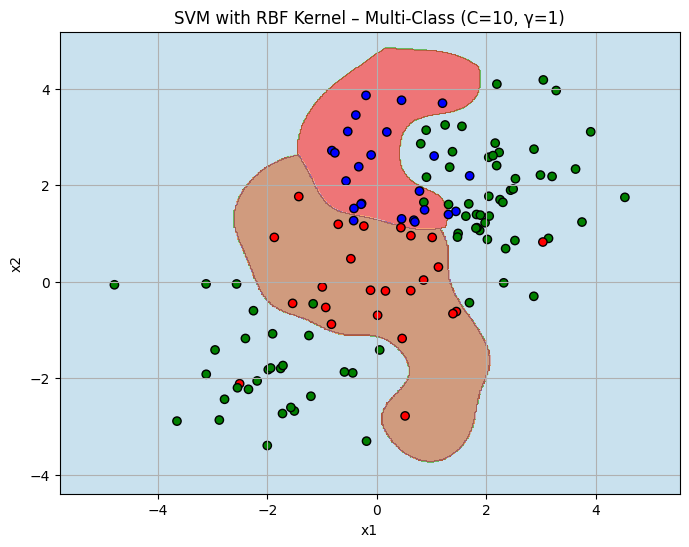

In [27]:
# Create mesh grid for plotting
x_min, x_max = x_train_multi[:, 0].min() - 1, x_train_multi[:, 0].max() + 1
y_min, y_max = x_train_multi[:, 1].min() - 1, x_train_multi[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = svm_multi.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Color mapping for class labels
class_colors = {1: 'red', -1: 'green', 0: 'blue'}
point_colors = [class_colors[label] for label in y_train_multi]

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
plt.scatter(x_train_multi[:, 0], x_train_multi[:, 1],
            c=point_colors, edgecolor='k')
plt.title("SVM with RBF Kernel – Multi-Class (C=10, γ=1)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


In [29]:


# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.5, 1, 2, 3]
}

# Create GridSearchCV object (SVC with RBF kernel)
svc = SVC(kernel='rbf')
grid_multi = GridSearchCV(svc, param_grid, cv=5)

# Fit on multi-class training set
grid_multi.fit(x_train_multi, y_train_multi)
# Best parameters and score
print("Best parameters found:", grid_multi.best_params_)
print("Best CV accuracy:", grid_multi.best_score_)

# Full result table
import pandas as pd
results_df_multi = pd.DataFrame(grid_multi.cv_results_)
display(results_df_multi[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']])



Best parameters found: {'C': 1, 'gamma': 1}
Best CV accuracy: 0.768


,param_C,param_gamma,mean_test_score,std_test_score
0,0.1,0.5,0.616,0.019596
1,0.1,1.0,0.616,0.019596
2,0.1,2.0,0.616,0.019596
3,0.1,3.0,0.616,0.019596
4,1.0,0.5,0.760,0.071554
5,1.0,1.0,0.768,0.058788
6,1.0,2.0,0.736,0.054259
7,1.0,3.0,0.712,0.053066
8,10.0,0.5,0.768,0.099277
9,10.0,1.0,0.760,0.056569


Assess the test set predictions for the best model.

In [30]:
from sklearn.metrics import confusion_matrix

# Get the best model
best_svm_multi = grid_multi.best_estimator_

# Predict on test data
y_test_pred_multi = best_svm_multi.predict(x_test_multi)

# Confusion matrix
conf_multi = confusion_matrix(y_test_multi, y_test_pred_multi, labels=[-1, 0, 1])
print("Confusion matrix:\n", conf_multi)

# Pretty display
print("\nFormatted confusion matrix:")
print(pd.DataFrame(conf_multi,
                   index=['Actual -1', 'Actual 0', 'Actual 1'],
                   columns=['Predicted -1', 'Predicted 0', 'Predicted 1']))


Confusion matrix:
 [[70  2  1]
 [ 5 12 10]
 [ 4  2 19]]

Formatted confusion matrix:
           Predicted -1  Predicted 0  Predicted 1
Actual -1            70            2            1
Actual 0              5           12           10
Actual 1              4            2           19



### Interpretation


####  **graph**

* Plotted the 3-class dataset using red (`1`), green (`−1`), and blue (`0`).
* Visually, the three classes occupy reasonably separate regions.


####  **Cross-Validation to Tune Hyperparameters**

* Used `GridSearchCV` to try combinations of `C` and `gamma`.
* Best model: `C=1`, `gamma=1`
* Best CV accuracy: **76.8%**
* Performance showed sensitivity to over- or under-fitting based on the parameter values.

#### **Evaluated on the Test Set**

#### **Class −1** (Majority class: 70 samples in test)

* Very well classified: **70 correct**, only **3 misclassified**.
* Strong boundary, probably because class −1 has the largest sample size and widest spatial separation.

#### **Class 0**

* Only **12/27** were classified correctly.
* Misclassified often as `1` as see on the graph `0` overlaps with class `1`.

#### **Class 1**

* Moderately well classified: **19 correct out of 25**
* Mostly confused with other class becuse we can see overlapping.

---

#### othe observations

* **Accuracy is good**, but the model might be biased toward the majority class — especially important in imbalanced settings.
* SVM handles **multi-class classification** well using **one-vs-one decomposition**.
* **Hyperparameter tuning (C, γ)** plays a key role in balancing complexity and generalization.



### Apply SVM to Gene Expression Data
The Khan data set consists of gene expression measurements for genes and the
forresponding 4 cancer subtypes. The training and test sets consist of and datapoints, respectively.


Load the data and get yourself an overview.


In [32]:
import pandas as pd

# Load feature matrices
xtrain = pd.read_csv("dataset/Khan_xtrain.csv", index_col=0)
xtest = pd.read_csv("dataset/Khan_xtest.csv", index_col=0)

# Load labels
ytrain = pd.read_csv("dataset/Khan_ytrain.csv", index_col=0).squeeze("columns")
ytest = pd.read_csv("dataset/Khan_ytest.csv", index_col=0).squeeze("columns")

# Confirm shapes
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

# Quick look at data
print("\nPreview of xtrain:")
print(xtrain.head())

print("\nPreview of ytrain:")
print(ytrain.head())


xtrain shape: (63, 2308)
xtest shape: (20, 2308)
ytrain shape: (63,)
ytest shape: (20,)

Preview of xtrain:
          V1        V2        V3        V4        V5        V6        V7  \
V1  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
V2 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
V3 -0.084469 -1.649739 -0.241308 -2.875286 -0.889405 -0.027474  1.159300   
V4  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
V5  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

          V8        V9       V10  ...     V2299     V2300     V2301     V2302  \
V1  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
V2 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
V3  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
V4  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
V5  0.771450  0.030917  0.2783

Use a support vector approach to predict the cancer subtypes using gene expression
measurements.
In this data set, there are a very large number of features relative to the number of
observations. This suggests that we should use a linear kernel, because the additional
flexibility that will result from using a polynomial or radial kernel is unnecessary

In [34]:


# Train SVM with linear kernel and C=10
svm_khan = SVC(kernel='linear', C=10)
svm_khan.fit(xtrain, ytrain)

# View summary-like information
print("Number of support vectors per class:")
print(svm_khan.n_support_)

print("\nTotal support vectors:", len(svm_khan.support_))
print("\nClasses:", svm_khan.classes_)


Number of support vectors per class:
[ 7 18  9 20]

Total support vectors: 54

Classes: [1 2 3 4]


Assess the training error.


In [35]:

ytrain_pred = svm_khan.predict(xtrain)

conf_train = confusion_matrix(ytrain, ytrain_pred, labels=svm_khan.classes_)
print("Training confusion matrix:\n", conf_train)

import pandas as pd
print("\nFormatted confusion matrix (Training):")
print(pd.DataFrame(conf_train,
                   index=[f"Actual {c}" for c in svm_khan.classes_],
                   columns=[f"Predicted {c}" for c in svm_khan.classes_]))


Training confusion matrix:
 [[ 8  0  0  0]
 [ 0 23  0  0]
 [ 0  0 12  0]
 [ 0  0  0 20]]

Formatted confusion matrix (Training):
          Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 1            8            0            0            0
Actual 2            0           23            0            0
Actual 3            0            0           12            0
Actual 4            0            0            0           20


We see that there are no training errors. In fact, this is not surprising, because the large
number of variables relative to the number of observations implies that it is easy to find
hyperplanes that fully separate the classes. We are most interested not in the support vector
classifier’s performance on the training observations, but rather its performance on the test
observations.
Assess the test error.

In [36]:
# Predict on test set
ytest_pred = svm_khan.predict(xtest)

# Confusion matrix
conf_test = confusion_matrix(ytest, ytest_pred, labels=svm_khan.classes_)
print("Test confusion matrix:\n", conf_test)

# Nicely formatted table
print("\nFormatted confusion matrix (Test):")
print(pd.DataFrame(conf_test,
                   index=[f"Actual {c}" for c in svm_khan.classes_],
                   columns=[f"Predicted {c}" for c in svm_khan.classes_]))


Test confusion matrix:
 [[3 0 0 0]
 [0 6 0 0]
 [0 2 4 0]
 [0 0 0 5]]

Formatted confusion matrix (Test):
          Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 1            3            0            0            0
Actual 2            0            6            0            0
Actual 3            0            2            4            0
Actual 4            0            0            0            5


### Interpretation



#### **the Data**

* **Training set:** 63 observations, **2308 features**
* **Test set:** 20 observations, 2308 features
* **Labels:** 4 cancer subtypes (1, 2, 3, 4)

---

#### **2. Trained a Linear SVM (`C = 10`)**

* Used `SVC(kernel='linear', C=10)`
* Found **54 support vectors** distributed across all classes
* Printed model metadata (support vectors, class labels)

---

#### when evaluated on Training Data it achieved **perfect classification** as expected,with 2308 dimensions and only 63 samples, the model has **more than enough flexibility** to **perfectly separate** the training data, in other words due to the high-dimensional feature space; SVM can easily find separating hyperplanes.


#### when Evaluated on Test Data it was sligtly worse with only 90% accruacy which is excellent given the small sample size and class variety.

